In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
MLR = LinearRegression()

In [3]:
base = pd.read_csv('../../Data/BaseData.csv')

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
len(y)

2580

In [6]:
X.shape

(2580, 298)

In [7]:
X.shape[1]

298

In [8]:
AR2_Base = []
MAE_Base = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_Base.append(mae)

In [9]:
PositiveAR2 = []
NegativeAR2 = []

for i in AR2_Base:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [10]:
len(NegativeAR2)

12

In [11]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})

In [12]:
Base

,AR2_Base,MAE_Base
0,0.912001,1.438730e+04
1,-12359.592216,3.344799e+05
2,0.823876,1.583486e+04
3,0.814466,1.583649e+04
4,0.898520,1.494276e+04
...,...,...
95,0.908097,1.483899e+04
96,0.846905,1.546044e+04
97,-342898.690100,1.649640e+06
98,0.908505,1.451078e+04


In [13]:
Base = Base[Base.AR2_Base > 0]
Base

,AR2_Base,MAE_Base
0,0.912001,14387.300831
2,0.823876,15834.864817
3,0.814466,15836.489103
4,0.898520,14942.756598
5,0.897354,13730.387144
...,...,...
94,0.854590,15610.859998
95,0.908097,14838.991404
96,0.846905,15460.436361
98,0.908505,14510.784536


In [14]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [15]:
base_drop1.shape

(2579, 300)

In [16]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [17]:
len(y2)

2579

In [18]:
X2.shape

(2579, 299)

In [19]:
X2.shape[1]

299

In [20]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_Drop1.append(mae)

In [21]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})

In [22]:
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.916732,15110.472291
1,0.905957,14974.058329
2,0.903057,14712.791971
3,0.882087,14655.371435
4,0.928528,13639.156713
...,...,...
95,0.871560,15751.389909
96,0.902176,14074.784935
97,0.890160,15900.143750
98,0.895952,16421.780336


In [23]:
BaseDrop1 = BaseDrop1[BaseDrop1.AR2_Drop1 > 0]
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.916732,15110.472291
1,0.905957,14974.058329
2,0.903057,14712.791971
3,0.882087,14655.371435
4,0.928528,13639.156713
...,...,...
95,0.871560,15751.389909
96,0.902176,14074.784935
97,0.890160,15900.143750
98,0.895952,16421.780336


In [30]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')
base_drop_IF.shape

(2567, 299)

In [31]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [32]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_DropIF.append(mae)

In [33]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.898389,1.501480e+04
1,0.914920,1.416328e+04
2,0.880362,1.449980e+04
3,-153.814067,4.484600e+04
4,0.924566,1.344480e+04
...,...,...
95,-211830.479994,1.330679e+06
96,0.911859,1.336492e+04
97,0.907772,1.490669e+04
98,0.916486,1.393906e+04


In [35]:
BaseDropIF = BaseDropIF[BaseDropIF.AR2_DropIF > 0]
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.898389,15014.802006
1,0.914920,14163.280755
2,0.880362,14499.797618
4,0.924566,13444.804511
5,0.920624,13640.834080
...,...,...
94,0.922558,13628.796654
96,0.911859,13364.916225
97,0.907772,14906.687364
98,0.916486,13939.058061


In [36]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.912001,14387.300831,0.916732,15110.472291,0.898389,15014.802006
1,NaN,NaN,0.905957,14974.058329,0.914920,14163.280755
2,0.823876,15834.864817,0.903057,14712.791971,0.880362,14499.797618
3,0.814466,15836.489103,0.882087,14655.371435,NaN,NaN
4,0.898520,14942.756598,0.928528,13639.156713,0.924566,13444.804511
...,...,...,...,...,...,...
95,0.908097,14838.991404,0.871560,15751.389909,NaN,NaN
96,0.846905,15460.436361,0.902176,14074.784935,0.911859,13364.916225
97,NaN,NaN,0.890160,15900.143750,0.907772,14906.687364
98,0.908505,14510.784536,0.895952,16421.780336,0.916486,13939.058061


In [37]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,88.000000,88.000000,80.000000,80.000000,80.000000,80.000000
mean,0.883286,14918.053679,0.903384,14735.638675,0.904051,14352.126580
std,0.032788,702.154261,0.015220,873.519313,0.016785,558.805783
min,0.731573,13529.538414,0.856127,13009.573856,0.849621,13364.916225
25%,0.862292,14418.110559,0.897246,14183.763175,0.899601,13959.048364
50%,0.895957,14873.089799,0.906075,14626.085026,0.909720,14222.916311
75%,0.904946,15355.025160,0.913685,15114.915282,0.914922,14708.169614
max,0.919525,17680.246510,0.928528,19444.912410,0.929638,15966.362104


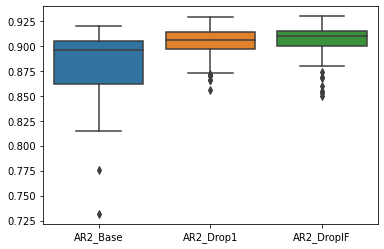

In [38]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

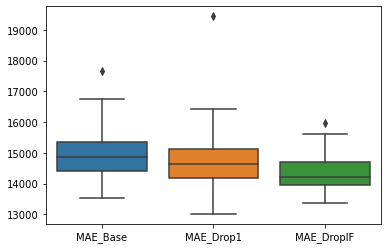

In [39]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);